In [16]:
"""
Landon Buell
Marek Petrik
CS 750.01
3 April 2020
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Problem 1 [33%] 
### Here we explore the maximal margin classiﬁer on a toy data set. 

#### (a) We are given n = 7 observations in p = 2 dimensions. For each observation, there is an associated class label. Sketch (by hand is OK) the observations.

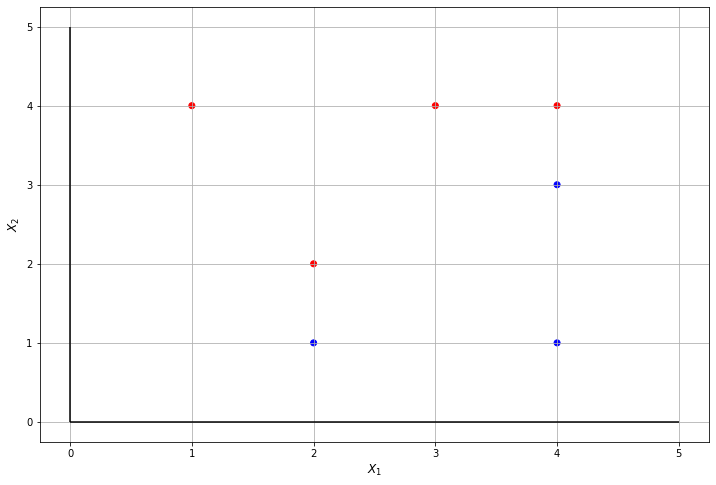

In [17]:
# Design Matricies
X = np.array([[3,4],[2,2],[4,4],[1,4],[2,1],[4,3],[4,1]])
y = ['red','red','red','red','blue','blue','blue']

# visualize
plt.figure(figsize=(12,8))
plt.xlabel('$X_1$',size=12,weight='bold')
plt.ylabel('$X_2$',size=12,weight='bold')
plt.scatter(x=X.transpose()[0],y=X.transpose()[1],c=y)
plt.vlines(0,0,5,color='black')
plt.hlines(0,0,5,color='black')
plt.grid()
plt.show()

#### (b) Sketch (by hand is OK) the optimal separating hyperplane, and provide the equation for this hyperplane (of the form (9.1)). 

Equation: $-\frac{1}{2} + 1 X_1 - 1 X_2 $

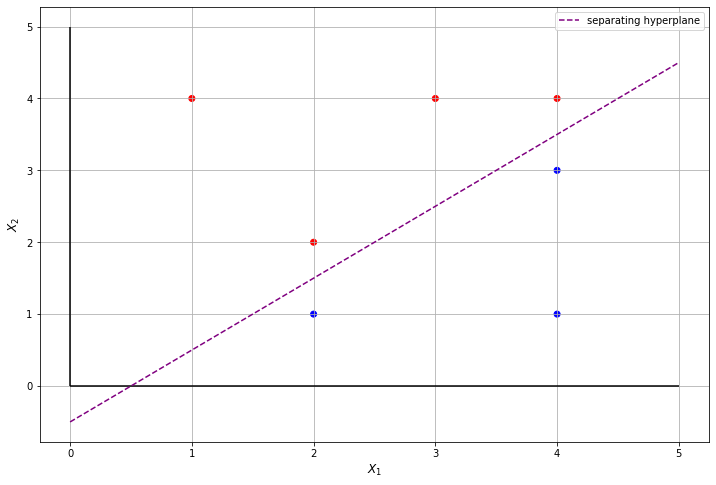

In [18]:
# Design Matricies
X = np.array([[3,4],[2,2],[4,4],[1,4],[2,1],[4,3],[4,1]])
y = ['red','red','red','red','blue','blue','blue']

hyperplane = 1*np.arange(0,6) - 1/2

# visualize w/ hyperplane
plt.figure(figsize=(12,8)) 
plt.xlabel('$X_1$',size=12,weight='bold')
plt.ylabel('$X_2$',size=12,weight='bold')
plt.scatter(x=X.transpose()[0],y=X.transpose()[1],c=y)
plt.plot(hyperplane,linestyle='--',color='purple',label='separating hyperplane')
plt.vlines(0,0,5,color='black')
plt.hlines(0,0,5,color='black')
plt.legend()
plt.grid()
plt.show()

#### (c) Describe the classiﬁcation rule for the maximal margin classiﬁer. It should be something along the lines of “Classify to Red if $\beta_0 +\beta_1 X_1 +\beta_2 X_2 > 0$, and classify to Blue otherwise.” Provide the values for $\beta_0$, $\beta_1$, and $\beta_2$.

Classification Rule:
Class = 'Red' if $$\beta_0 + \beta_1 X_1 + \beta_2 X_2 > 0$$
Class = 'Blue' if $$\beta_0 + \beta_1 X_1 + \beta_2 X_2 < 0$$
Where $$\beta_0 = -\frac{1}{2} , \beta_1 = 1 , \beta_2 = -1 $$

#### (d) On your sketch, indicate the margin for the maximal margin hyperplane. 

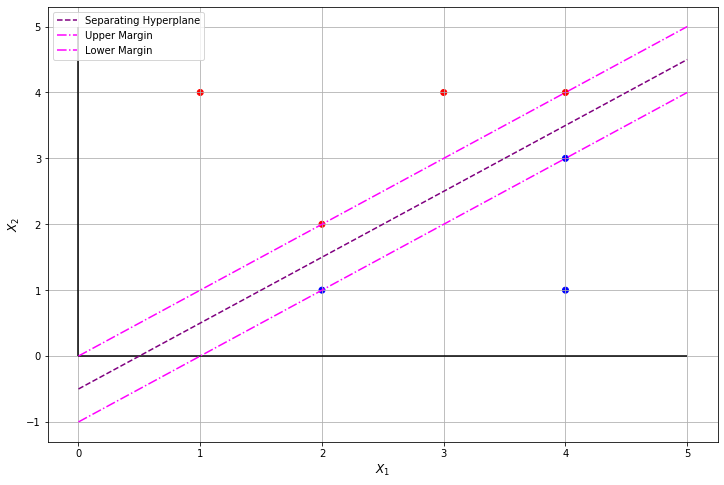

In [19]:
# Design Matricies
X = np.array([[3,4],[2,2],[4,4],[1,4],[2,1],[4,3],[4,1]])
y = ['red','red','red','red','blue','blue','blue']

# Hyper planes
hyperplane = 1*np.arange(0,6) - 1/2
upper = 1*np.arange(0,6)
lower = 1*np.arange(0,6) - 1

# visualize w/ hyperplane
plt.figure(figsize=(12,8)) 
plt.xlabel('$X_1$',size=12,weight='bold')
plt.ylabel('$X_2$',size=12,weight='bold')
plt.scatter(x=X.transpose()[0],y=X.transpose()[1],c=y)
plt.plot(hyperplane,linestyle='--',color='purple',label='Separating Hyperplane')
plt.plot(upper,linestyle='-.',color='magenta',label='Upper Margin')
plt.plot(lower,linestyle='-.',color='magenta',label='Lower Margin')
plt.vlines(0,0,5,color='black')
plt.hlines(0,0,5,color='black')
plt.legend()
plt.grid()
plt.show()

#### (e) Indicate the support vectors for the maximal margin classiﬁer. How will the number of support vectors depend on the dimensionality of the space. 

#### (f) Argue that a slight movement of the seventh observation would not aﬀect the maximal margin hyperplane. 

The 7th data point is located at $X_1 = 4$ , $X_2 = 1$. The maximal margin classifier relatively far from this oint. If we were to change the value of either feature by 1 unit in any direction, the perturbed sample would still lie on same side of a separating hyperplane. Thus, a "slight movement" change would have the same result.

#### (g) Sketch a hyperplane that is not the optimal separating hyper-plane, and provide the equation for this hyperplane.

#### (h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane.

# Problem 2 [33%] 
### Generate a simulated two-class data set with 200 observations and two features in which there is a visible but non-linear separation between the two classes. Explore whether in this setting, a support vector machine with a polynomial kernel (with degree greater than 1) or a radial kernel will outperform a support vector classiﬁer on the training data. Which technique performs best on the test data? Make plots and report training and test error rates in order to back up your assertions.

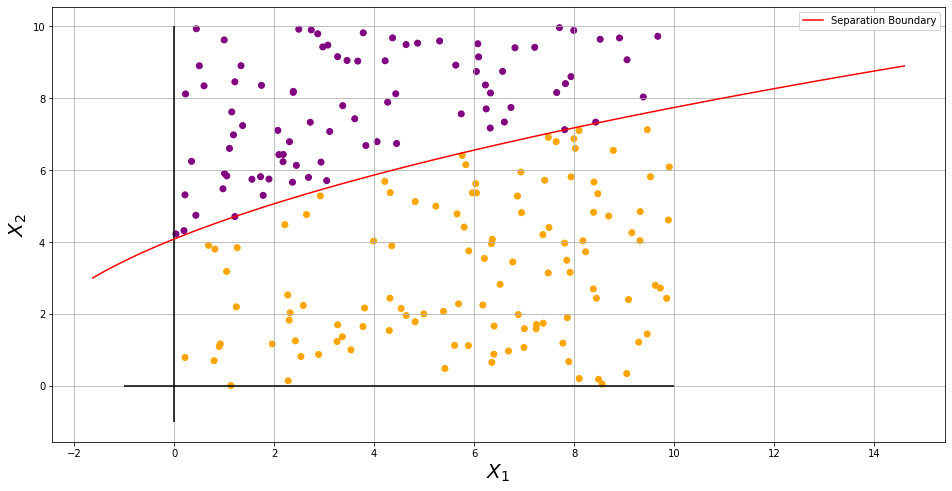

In [43]:
""" Generate the Simulated Data set - Numpy.Random() """

X1 = np.random.random(size=200)*10
X2 = np.random.random(size=200)*10

labels = []

a,b,c,d = 0.7,-0.9,-2.7,-8

for x1,x2 in zip(X1,X2):
    if a*x2**2 + b*x2 + c*x1 + d > 0:
        labels.append('purple')
    else:
        labels.append('orange')
        
base = np.arange(3,9,0.1)
curve = -(a/c)*base**2 - (b/c)*base - (d/c)

# visualize w/ hyperplane
plt.figure(figsize=(16,8)) 
plt.xlabel('$X_1$',size=20,weight='bold')
plt.ylabel('$X_2$',size=20,weight='bold')

plt.scatter(x=X1,y=X2,c=labels)

plt.plot(curve,base,color='red',label='Separation Boundary')

plt.vlines(0,-1,10,color='black')
plt.hlines(0,-1,10,color='black')

plt.legend()
plt.grid()
plt.show()

In [57]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

SVC_CLF = SVC(C=100,kernel='linear',degree=2,gamma='auto')

# Concatenate X1 & X2
X = np.array([X1,X1]).transpose()
y = labels[:]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)

SVC_CLF = SVC_CLF.fit(X_train,y_train)
y_pred = SVC_CLF.predict(X_test)

#classification_report(y_test,y_pred)
SVC_CLF.predict([[2.,2.],[4.,8.]])


array(['orange', 'orange'], dtype='<U6')

# Problem 3 [33%] 
### Apply SVMs and at least 3 diﬀerent kernels to a data set of your choice. Use cross-validation to optimize the parameter C. Be sure to ﬁt the models on a training set and to evaluate their performance on a test set. How accurate are the results compared to simple methods like linear or logistic regression? Which of these approaches yields the best performance?